In [30]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd

# Install required Python packages 
# !pip install scipy matplotlib

import matplotlib.pyplot as plt


In [31]:
def SICZ(x, t, parameters):
    # Extract state variables
    S = x[0]
    I = x[1]
    C = x[2]
    Z = x[3]
    
    N = S + I + C

    # Extract parameters
    beta_p = parameters['beta_p']  # transmission 
    beta_c = parameters['beta_c']  # transmission from carcass
    beta_z = parameters['beta_z']  # transmission from zoospore pool
    a = parameters['a']            # disease induced death rate
    lamdaC = parameters['lamdaC']  # decay of carcass
    sigma = parameters['sigma']    # shed rate from infected
    mu = parameters['mu']          # shed rate from carcass
    lamdaZ = parameters['lamdaZ']  # decay rate of zoospores
    r = parameters['r']            # recovery rate

    # Differential equations
    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
    dI = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (I * a)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)

    return [dS, dI, dC, dZ]


In [32]:
# Initial conditions for different population sizes
initial_cond_Large = [999, 1, 0, 0]   # S, I, C, Z
initial_cond_Med = [99, 1, 0, 0]
initial_cond_Small = [9, 1, 0, 0]

# Time points
times = np.linspace(0, 365, num=365)

# Parameters dictionary
params = {
    "beta_p": 0.023,
    "beta_c": 0.023,
    "beta_z": 0.0001,
    "lamdaC": 1/4,
    "lamdaZ": 1/21.6,
    "sigma": 0.001,
    "mu": 0.01,
    "a": 1/26.5,
    "r": 0  # Add recovery rate if needed, or remove if not used
}

# Integrate the SICZ model for each initial condition
resultsSICZLarge = odeint(SICZ, initial_cond_Large, times, args=(params,))
resultsSICZSmall = odeint(SICZ, initial_cond_Small, times, args=(params,))
resultsSICZMed = odeint(SICZ, initial_cond_Med, times, args=(params,))

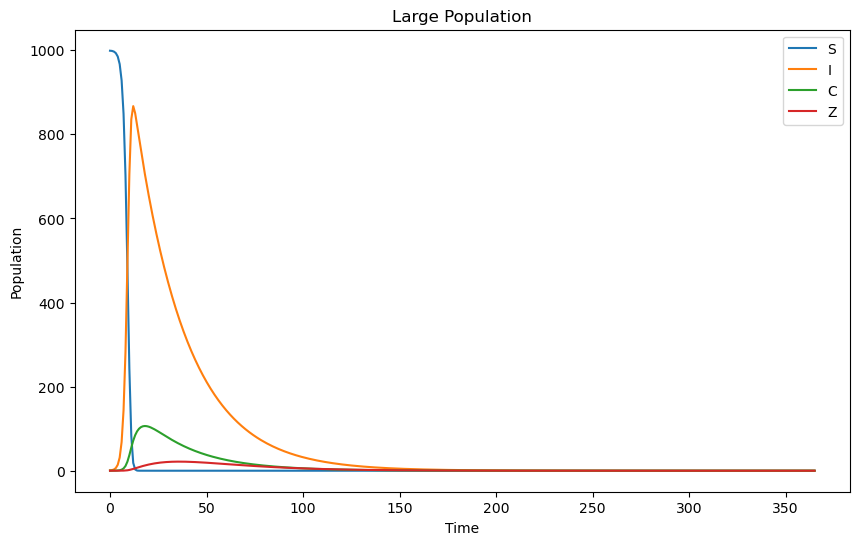

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(times, resultsSICZLarge[:, 0], label='S')
plt.plot(times, resultsSICZLarge[:, 1], label='I')
plt.plot(times, resultsSICZLarge[:, 2], label='C')
plt.plot(times, resultsSICZLarge[:, 3], label='Z')
plt.title("Large Population")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

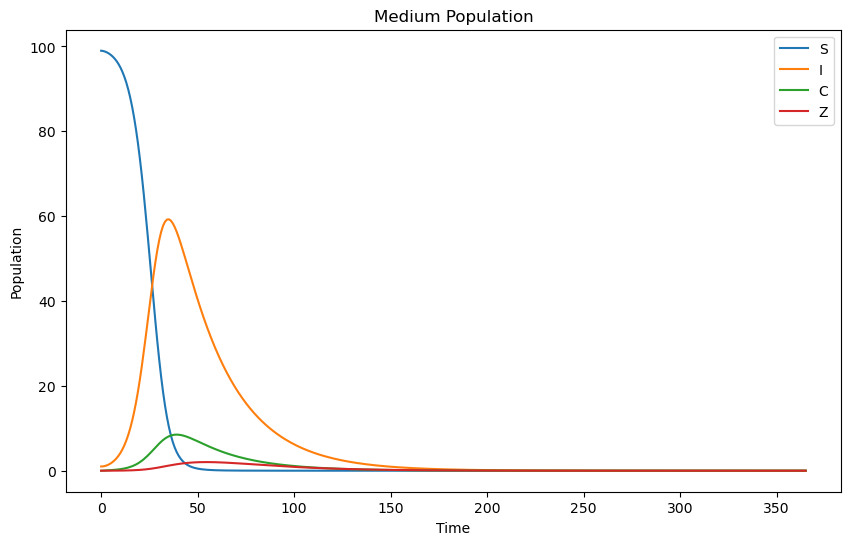

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(times, resultsSICZMed[:, 0], label='S')
plt.plot(times, resultsSICZMed[:, 1], label='I')
plt.plot(times, resultsSICZMed[:, 2], label='C')
plt.plot(times, resultsSICZMed[:, 3], label='Z')
plt.title("Medium Population")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

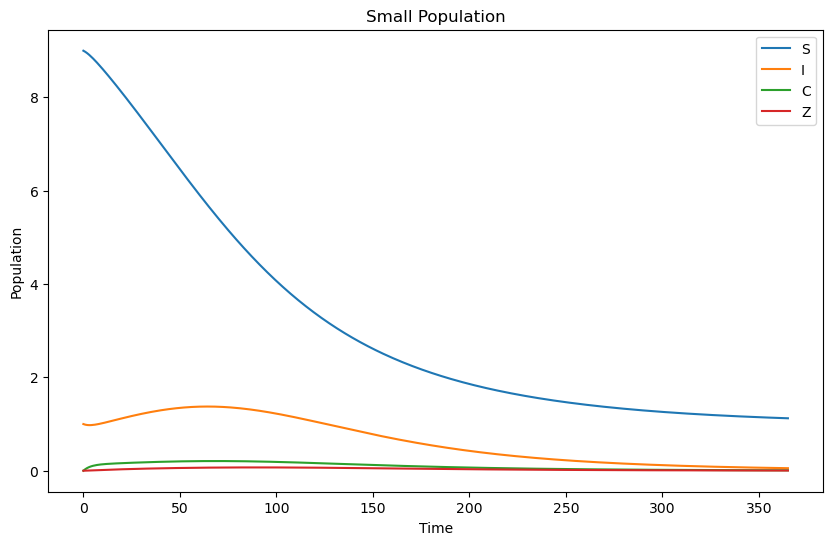

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(times, resultsSICZSmall[:, 0], label='S')
plt.plot(times, resultsSICZSmall[:, 1], label='I')
plt.plot(times, resultsSICZSmall[:, 2], label='C')
plt.plot(times, resultsSICZSmall[:, 3], label='Z')
plt.title("Small Population")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()